## Importing Data and Required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as Pandas Dataframe

In [4]:

df = pd.read_csv('data/stud.csv')

### Show top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

#### Check Duplicates value

In [7]:
df.duplicated().sum()

0

#### There are no duplicates values in the dataset

#### Check data Types

In [8]:
## Check Null and D types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the unique values

In [9]:
df.nunique() ## for all columns

## df['gender'].unique() gives the uniques value of that columns

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check Statistics of dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [11]:
print("Categories in gender variable",end="")
print(df['gender'].unique())

print("Categories in race_ethnicity variable",end="")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education variable",end="")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable",end="")
print(df['lunch'].unique())

print("Categories in test_preparation_course variable",end="")
print(df['test_preparation_course'].unique())


Categories in gender variable['female' 'male']
Categories in race_ethnicity variable['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable['standard' 'free/reduced']
Categories in test_preparation_course variable['none' 'completed']


In [12]:
## define numerical and categorical columns
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
cat_features = [feature for feature in df.columns if df[feature].dtype =='O']

#print columns
print('We have {} numerical features: {}'.format(len(num_features),num_features))
print('We have {} categorical features :{}'.format(len(cat_features),cat_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding colums for Total Score and Average

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of Students with full marks in Math: {math_full}")
print(f"Number of Students with full marks in Reading: {reading_full}")
print(f"Number of Students with full marks in Writing: {writing_full}")

Number of Students with full marks in Math: 7
Number of Students with full marks in Reading: 17
Number of Students with full marks in Writing: 14


In [15]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students less than 20 marks in matrh: {math_less_20}")
print(f"Number of students less than 20 marks in writing:{writing_less_20}")
print(f"Number of students less than 20 marks in writing:{reading_less_20}")

Number of students less than 20 marks in matrh: 4
Number of students less than 20 marks in writing:3
Number of students less than 20 marks in writing:1


## Histogram and KDE

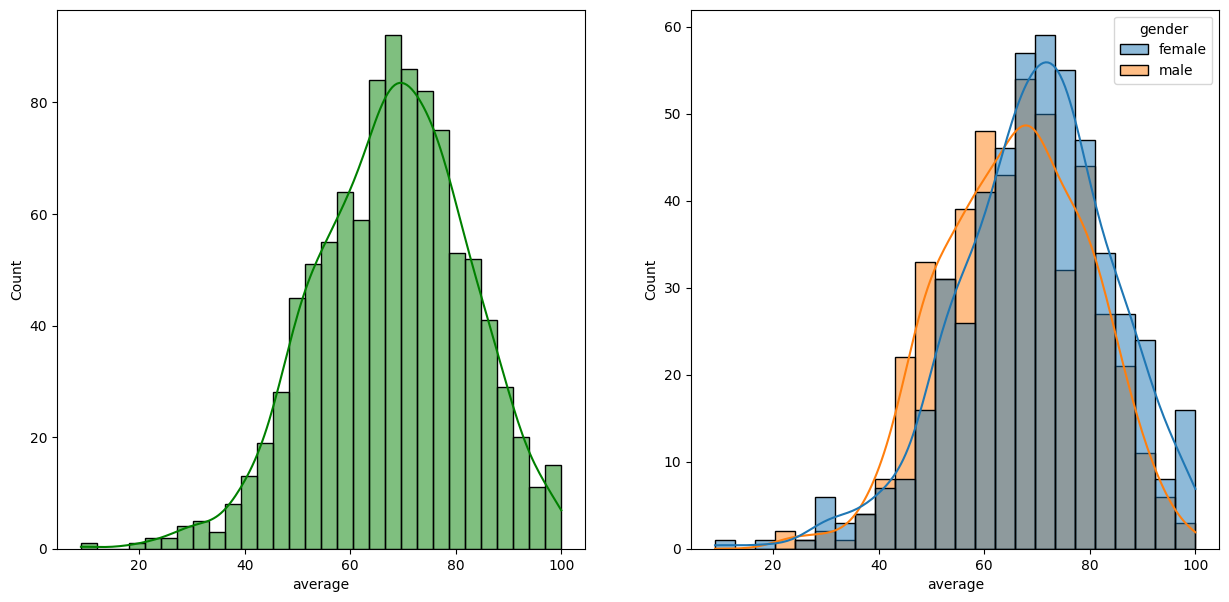

In [16]:
plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x = 'average',bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x = 'average',kde=True,hue='gender')
plt.show()


In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


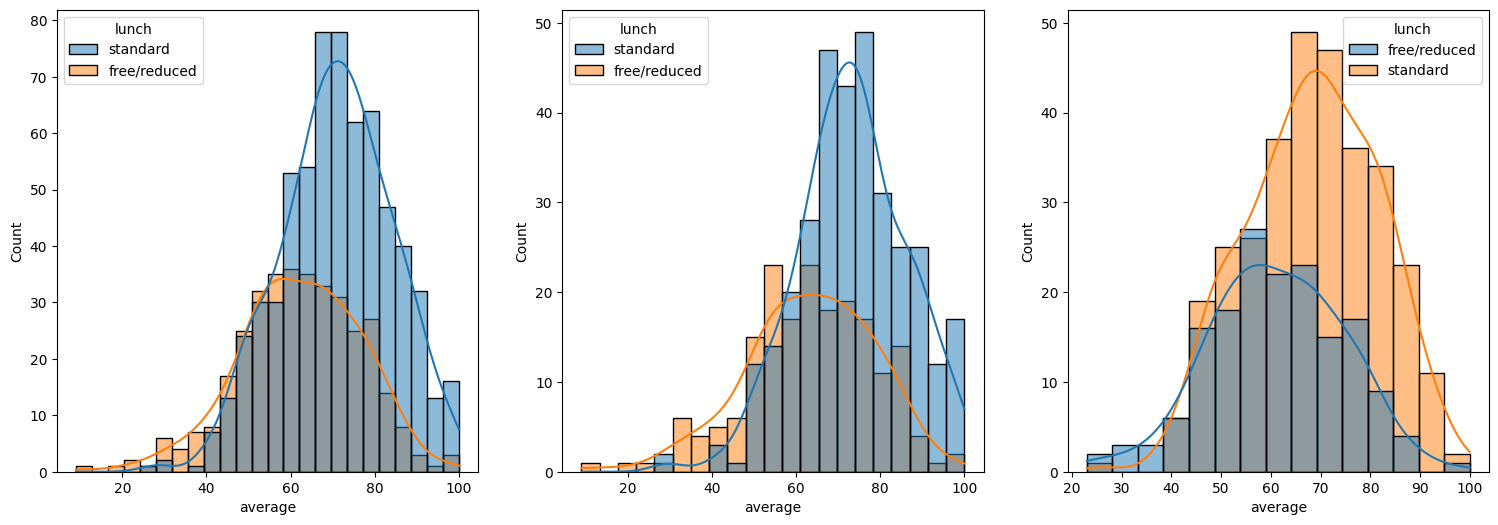

In [18]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x = 'average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x = 'average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x = 'average',kde=True,hue='lunch')
plt.show()

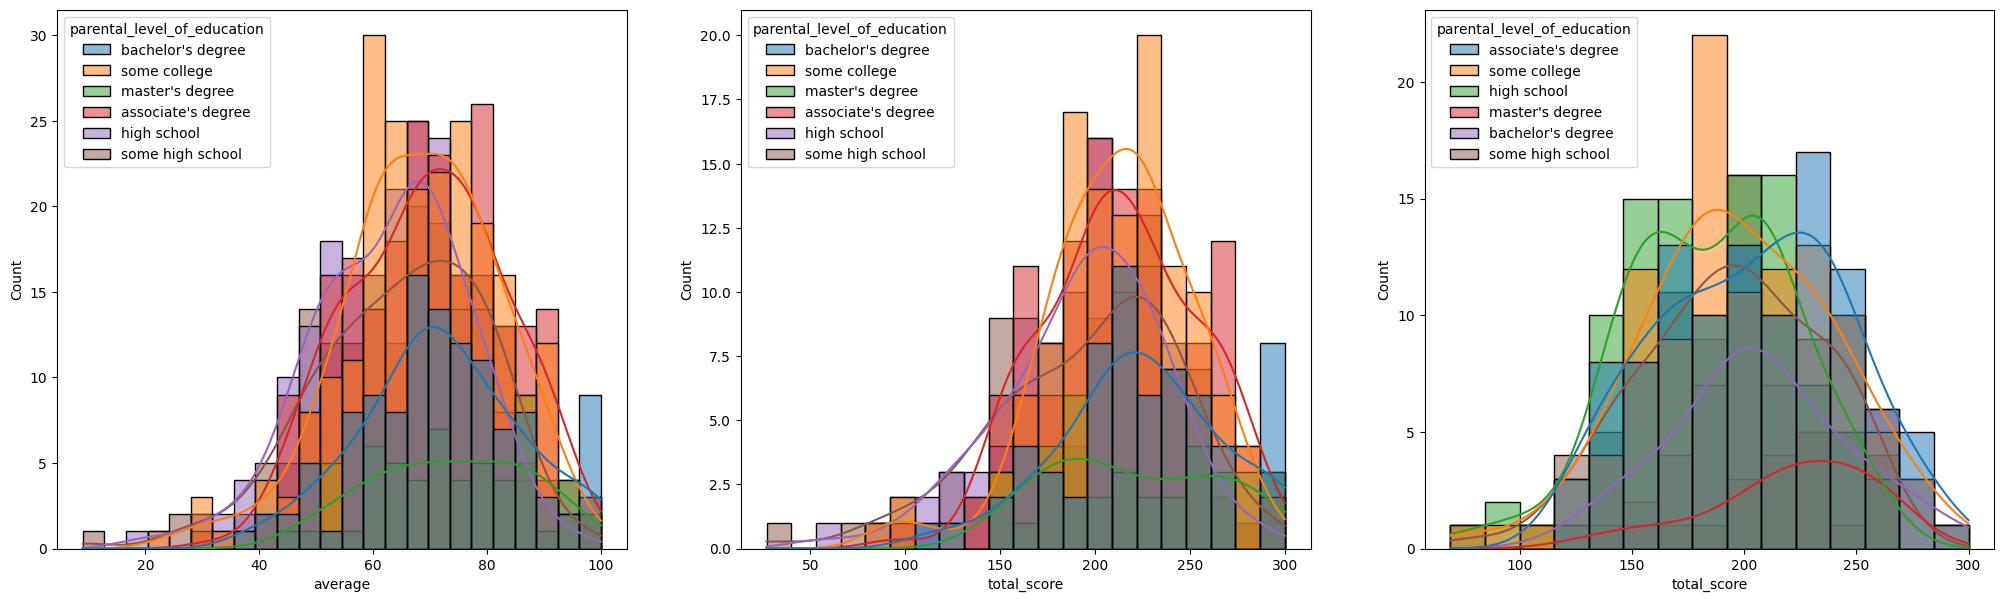

In [22]:
plt.subplots(1,3,figsize = (25,7))
plt.subplot(131)
sns.histplot(data=df ,x = 'average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x = 'total_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x = 'total_score',kde = True,hue = 'parental_level_of_education')
plt.show()

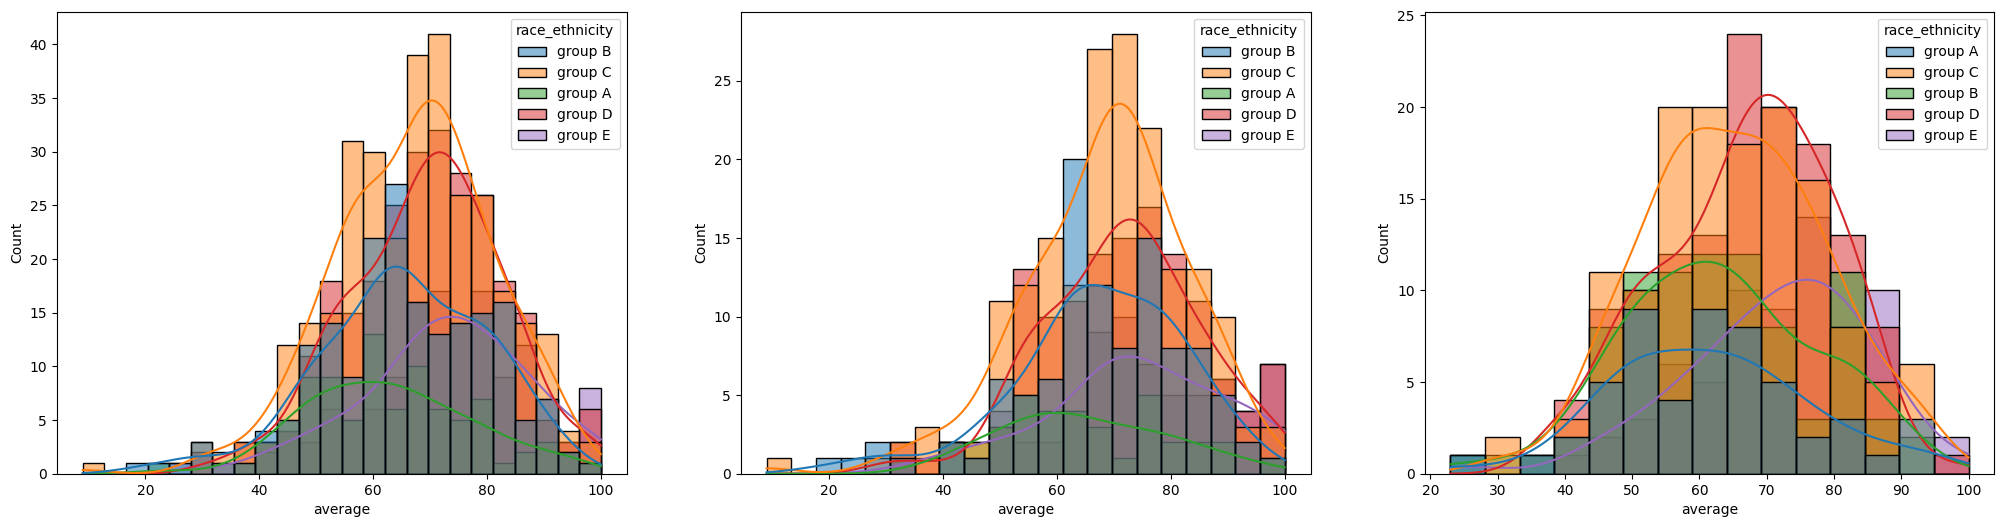

In [23]:
plt.subplots(1,2,figsize = (25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x = 'average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'],x = 'average',kde=True,hue='race_ethnicity')
plt.show()

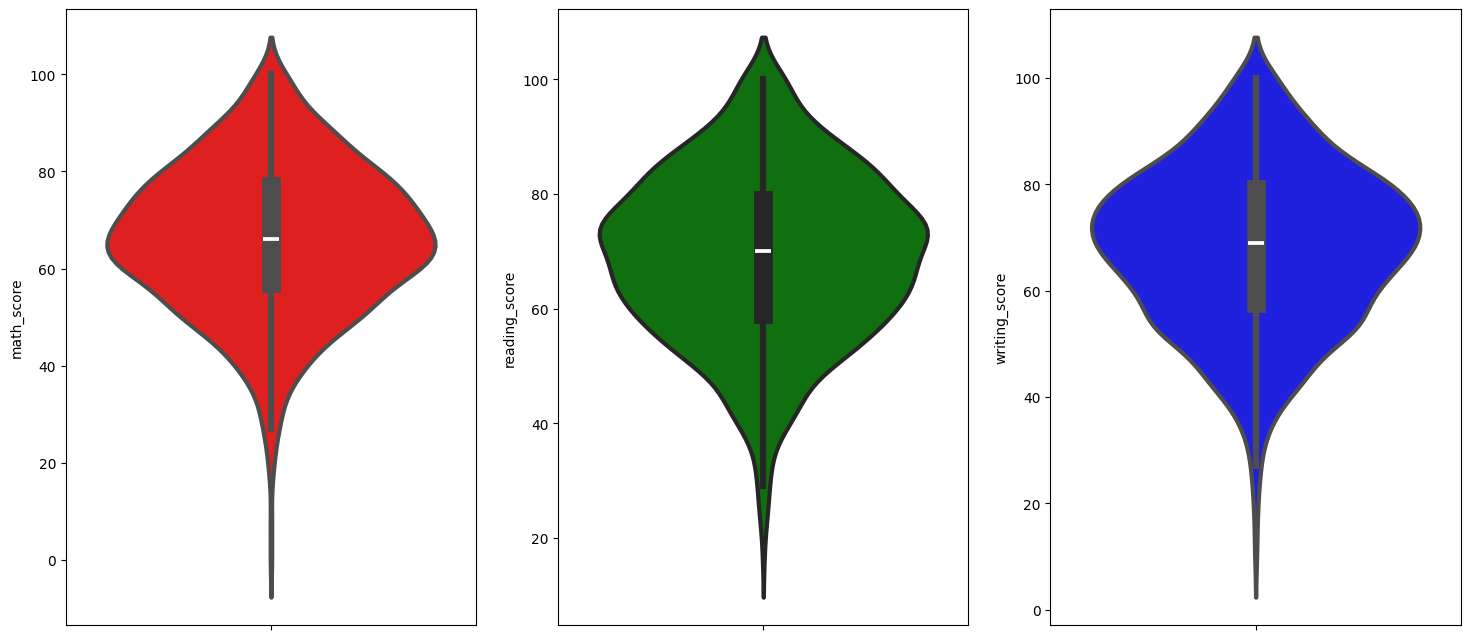

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df,y ='math_score',color='red',linewidth=3)
plt.subplot(1,3,2)
sns.violinplot(data=df,y = 'reading_score',color='green',linewidth=3)
plt.subplot(1,3,3)
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)
plt.show()